# Modelo de Regresión para precio de casas de EE.UU

In [131]:
# Librerias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.width", 100)
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:.3f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95% }</style>"))

In [3]:
# IMPORTAMOS BASE DE DATOS DE PRECIO DE CASAS Y SUS DIFERENTES CARACTERISTICAS CON LAS QUE TRABAJAREMOS
data = pd.read_csv(r'C:/Users/GUSTAVO/Desktop/GustavoALL/Cursos/01_ Bases de datos para Practicar/Venta de casas en el condado de King, EE. UU/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [4]:
# DE ESTA MANERA OBTENEMOS NUESTRAS VARIABLES PARA EL MODELO
data = pd.DataFrame(data[["price", "bathrooms", "bedrooms", "condition", "floors", "grade", "waterfront", "yr_built", "id"]])
data

,price,bathrooms,bedrooms,condition,floors,grade,waterfront,yr_built,id
0,221900.000,1.000,3,3,1.000,7,0,1955,7129300520
1,538000.000,2.250,3,3,2.000,7,0,1951,6414100192
2,180000.000,1.000,2,3,1.000,6,0,1933,5631500400
3,604000.000,3.000,4,5,1.000,7,0,1965,2487200875
4,510000.000,2.000,3,3,1.000,8,0,1987,1954400510
...,...,...,...,...,...,...,...,...,...
21608,360000.000,2.500,3,3,3.000,8,0,2009,263000018
21609,400000.000,2.500,4,3,2.000,8,0,2014,6600060120
21610,402101.000,0.750,2,3,2.000,7,0,2009,1523300141
21611,400000.000,2.500,3,3,2.000,8,0,2004,291310100


In [5]:
# RENOMBRAMOS NUESTRAS VARIABLES AL ESPAÑOL

data = data.rename(columns={"price":"precio", "bathrooms":"baños", "bedrooms":"dormitorios","condition":"condicion",
                        "floors":"pisos","grade":"puntuacion","waterfront":"frente_mar","yr_built":"año_const"})
data

,precio,baños,dormitorios,condicion,pisos,puntuacion,frente_mar,año_const,id
0,221900.000,1.000,3,3,1.000,7,0,1955,7129300520
1,538000.000,2.250,3,3,2.000,7,0,1951,6414100192
2,180000.000,1.000,2,3,1.000,6,0,1933,5631500400
3,604000.000,3.000,4,5,1.000,7,0,1965,2487200875
4,510000.000,2.000,3,3,1.000,8,0,1987,1954400510
...,...,...,...,...,...,...,...,...,...
21608,360000.000,2.500,3,3,3.000,8,0,2009,263000018
21609,400000.000,2.500,4,3,2.000,8,0,2014,6600060120
21610,402101.000,0.750,2,3,2.000,7,0,2009,1523300141
21611,400000.000,2.500,3,3,2.000,8,0,2004,291310100


In [6]:
# OBTENEMOS LAS ESTADISTICAS DESCRIPTIVAS DE LAS VARIABLES DE ESTUDIO, PARA SU ANALISIS
data.describe()

,precio,baños,dormitorios,condicion,pisos,puntuacion,frente_mar,año_const,id
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,2.115,3.371,3.409,1.494,7.657,0.008,1971.005,4580301520.865
std,367127.196,0.770,0.930,0.651,0.540,1.175,0.087,29.373,2876565571.312
min,75000.000,0.000,0.000,1.000,1.000,1.000,0.000,1900.000,1000102.000
25%,321950.000,1.750,3.000,3.000,1.000,7.000,0.000,1951.000,2123049194.000
50%,450000.000,2.250,3.000,3.000,1.500,7.000,0.000,1975.000,3904930410.000
75%,645000.000,2.500,4.000,4.000,2.000,8.000,0.000,1997.000,7308900445.000
max,7700000.000,8.000,33.000,5.000,3.500,13.000,1.000,2015.000,9900000190.000


In [7]:
# REALIZAREMOS UNA LIMPIEZA, EN EL CUAL SE ELIMINARAN LAS FILAS QUE NO TENGAN BAÑOS NI DORMITORIOS.

data = data[ (data["baños"]>=1) & (data["baños"]<=5)]
data

,precio,baños,dormitorios,condicion,pisos,puntuacion,frente_mar,año_const,id
0,221900.000,1.000,3,3,1.000,7,0,1955,7129300520
1,538000.000,2.250,3,3,2.000,7,0,1951,6414100192
2,180000.000,1.000,2,3,1.000,6,0,1933,5631500400
3,604000.000,3.000,4,5,1.000,7,0,1965,2487200875
4,510000.000,2.000,3,3,1.000,8,0,1987,1954400510
...,...,...,...,...,...,...,...,...,...
21606,1007500.000,3.500,4,3,2.000,9,0,2009,7936000429
21607,475000.000,2.500,3,3,2.000,8,0,2008,2997800021
21608,360000.000,2.500,3,3,3.000,8,0,2009,263000018
21609,400000.000,2.500,4,3,2.000,8,0,2014,6600060120


In [8]:
data = data[ ( data["dormitorios"]>=1) & ( data["dormitorios"]<=7)] # tambien los que no tengan dormitorios
data

,precio,baños,dormitorios,condicion,pisos,puntuacion,frente_mar,año_const,id
0,221900.000,1.000,3,3,1.000,7,0,1955,7129300520
1,538000.000,2.250,3,3,2.000,7,0,1951,6414100192
2,180000.000,1.000,2,3,1.000,6,0,1933,5631500400
3,604000.000,3.000,4,5,1.000,7,0,1965,2487200875
4,510000.000,2.000,3,3,1.000,8,0,1987,1954400510
...,...,...,...,...,...,...,...,...,...
21606,1007500.000,3.500,4,3,2.000,9,0,2009,7936000429
21607,475000.000,2.500,3,3,2.000,8,0,2008,2997800021
21608,360000.000,2.500,3,3,3.000,8,0,2009,263000018
21609,400000.000,2.500,4,3,2.000,8,0,2014,6600060120


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 21611
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       21458 non-null  float64
 1   baños        21458 non-null  float64
 2   dormitorios  21458 non-null  int64  
 3   condicion    21458 non-null  int64  
 4   pisos        21458 non-null  float64
 5   puntuacion   21458 non-null  int64  
 6   frente_mar   21458 non-null  int64  
 7   año_const    21458 non-null  int64  
 8   id           21458 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.6 MB


Vemos que nuestro DataFrame, no tiene nulos y que son de tipo númerico.

In [11]:
data.describe() # realizamos la estadisticas descriptivas

,precio,baños,dormitorios,condicion,pisos,puntuacion,frente_mar,año_const,id
count,21458.000,21458.000,21458.000,21458.000,21458.000,21458.000,21458.000,21458.000,21458.000
mean,536694.252,2.112,3.368,3.410,1.494,7.658,0.007,1971.081,4582415818.258
std,347571.476,0.746,0.880,0.650,0.540,1.156,0.084,29.337,2877471198.311
min,78000.000,1.000,1.000,1.000,1.000,4.000,0.000,1900.000,1000102.000
25%,322500.000,1.750,3.000,3.000,1.000,7.000,0.000,1952.000,2123212130.250
50%,450000.000,2.250,3.000,3.000,1.500,7.000,0.000,1975.000,3904945195.000
75%,643000.000,2.500,4.000,4.000,2.000,8.000,0.000,1997.000,7312400063.750
max,7062500.000,5.000,7.000,5.000,3.500,13.000,1.000,2015.000,9900000190.000


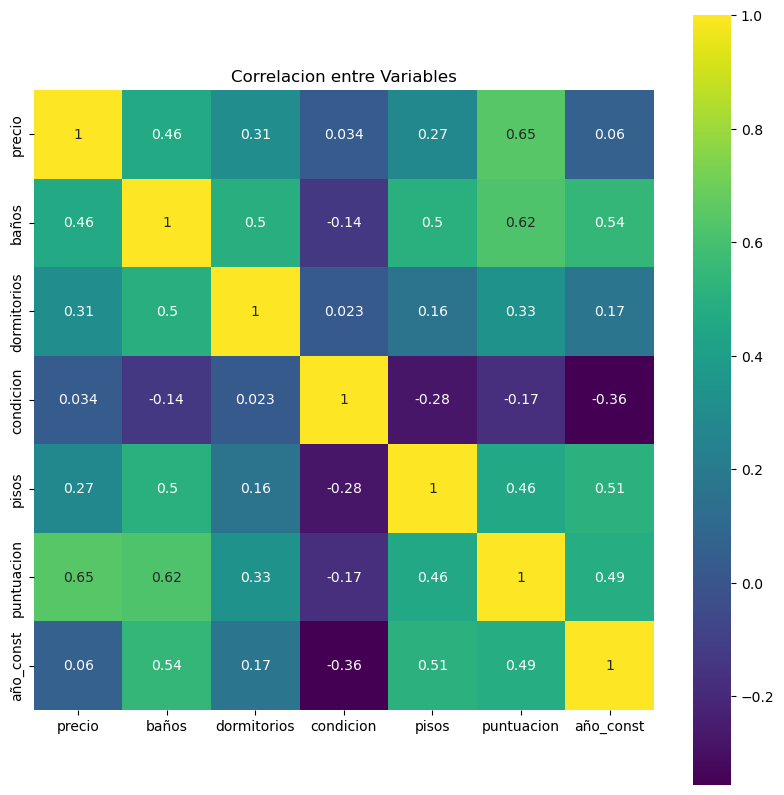

In [132]:
correlacion = data.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlacion,vmax=1, square=True, annot=True, cmap="viridis")
plt.title("Correlacion entre Variables")
plt.show()

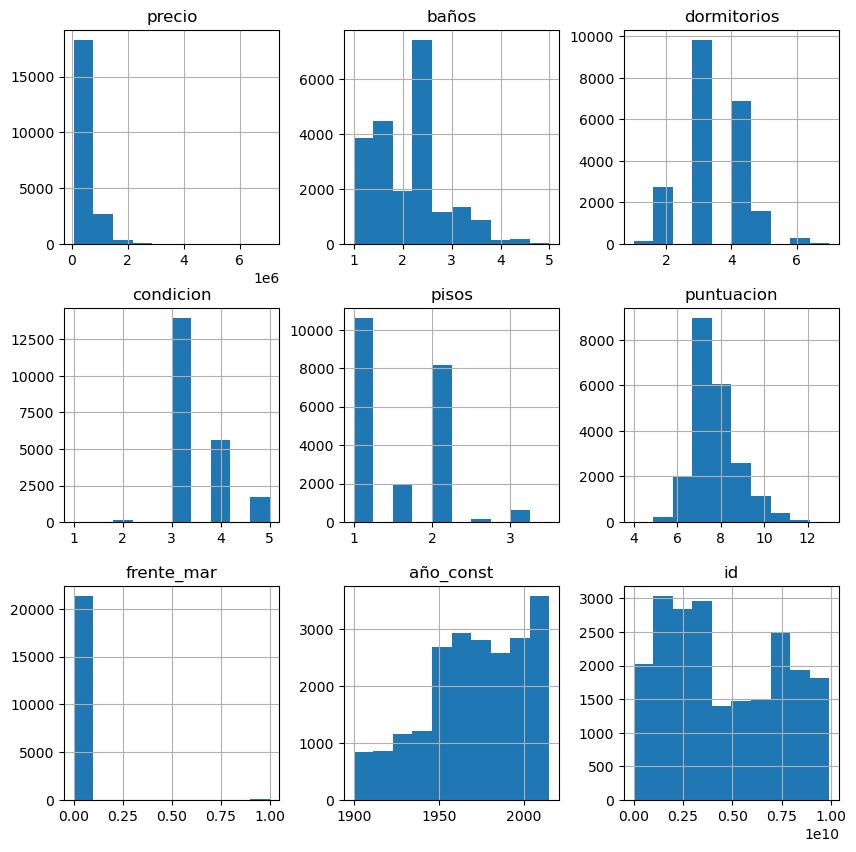

In [14]:
%matplotlib inline
# Univariate Histograms
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [15]:
data.groupby("frente_mar").size()

frente_mar
0    21305
1      153
dtype: int64

Podemos ver que nuestra variable "Frente al Mar" esta muy desbalanceado, ya que los más de 21 mil registros, 21305 son iguales a 0

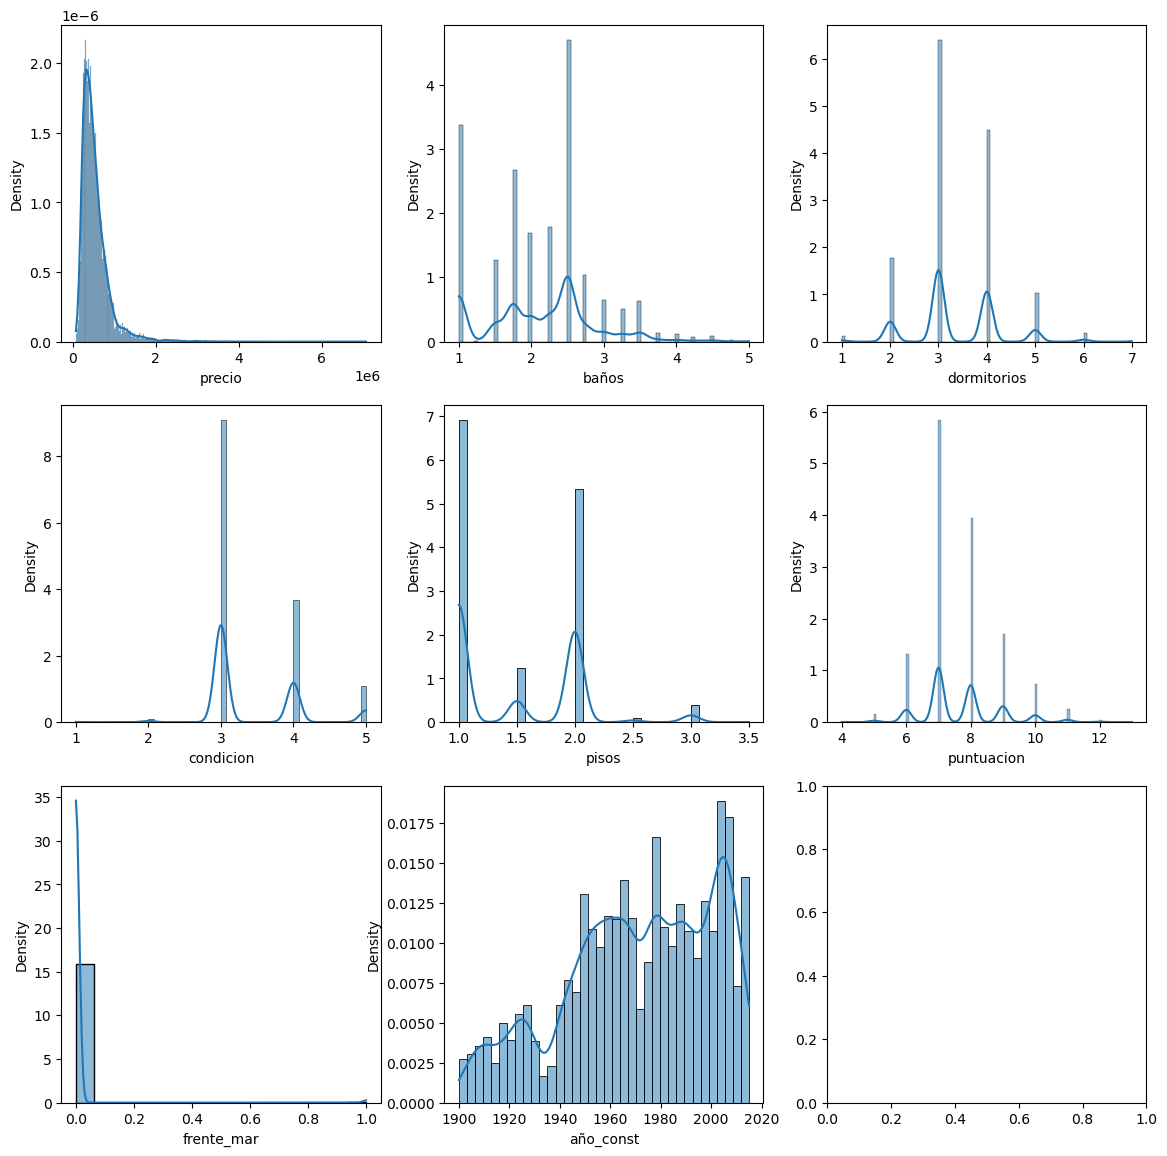

In [16]:
%matplotlib inline
# Univariate Histograms
fig, axes = plt.subplots(3,3, figsize=(14,14))
sns.histplot(data["precio"], kde=True, stat="density", ax= axes[0,0])
sns.histplot(data["baños"], kde=True, stat="density", ax= axes[0,1])
sns.histplot(data["dormitorios"], kde=True, stat="density", ax= axes[0,2])
sns.histplot(data["condicion"], kde=True, stat="density", ax= axes[1,0])
sns.histplot(data["pisos"], kde=True, stat="density", ax= axes[1,1])
sns.histplot(data["puntuacion"], kde=True, stat="density", ax= axes[1,2])
sns.histplot(data["frente_mar"], kde=True, stat="density", ax= axes[2,0])
sns.histplot(data["año_const"], kde=True, stat="density", ax= axes[2,1])
plt.show()

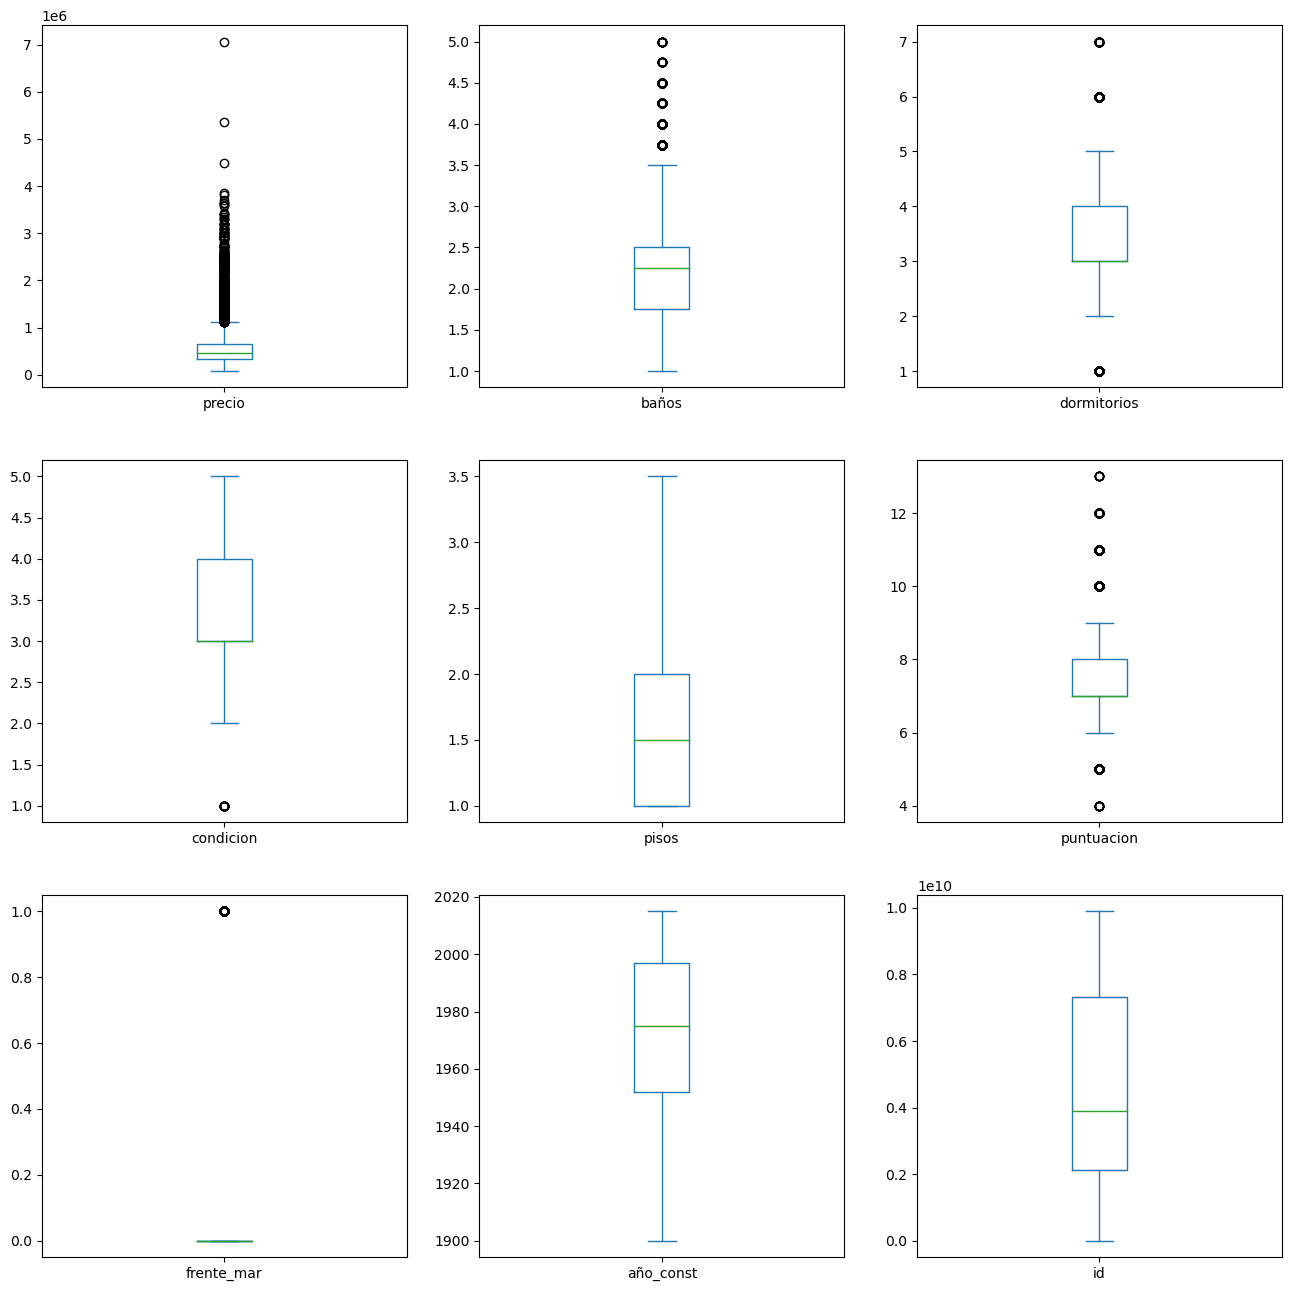

In [17]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
data.plot(ax = ax, kind = "box", subplots=True, layout= (3,3), sharex=False)
plt.show()

Se puede observar valores atipicos en nuestra variable Target.

In [19]:
anomalies = []
def find_anomalies(data):
    #identificar los limites mayores y menos, en dos veces la desviacion estandar.
    data_std = data.std()
    data_mean = data.mean()
    anomalia_cortada = data_std*2
    lower_limit = data_mean - anomalia_cortada
    upper_limit = data_mean + anomalia_cortada
    print("Limite superior:",lower_limit.iloc[0])
    print("Limite inferior:",upper_limit.iloc[0])
    
    #generar los outlyers
    for index, row in data.iterrows(): #data.iterrow, es por cada iteracion de la fila, en la data guardamos dos cosas, el index y la columna poblacion
        outlier = row # obtener la primera columna
        if (outlier.iloc[0] > upper_limit[0]) or (outlier.iloc[0] < lower_limit[0]):
            anomalies.append(index)
    return anomalies
find_anomalies(data.set_index("id")[["precio"]])

Limite superior: -158448.69907990273
Limite inferior: 1231837.2037867717


[2524049179,
 822039084,
 1802000060,
 4389200955,
 7855801670,
 46100204,
 2025069065,
 7960900060,
 4054500390,
 7424700045,
 3225069065,
 1860600135,
 4139480200,
 4139480200,
 713500030,
 8678500060,
 9808650060,
 4055700030,
 2625069070,
 5423010350,
 3885805665,
 4386700135,
 3225079035,
 622049114,
 1373800295,
 5486800070,
 3760500116,
 7613700521,
 5450900060,
 2225059214,
 6613000140,
 9273200140,
 1954700695,
 8081020370,
 4045100075,
 3323500030,
 2925059135,
 5700004028,
 7855300200,
 7237500390,
 7135520810,
 4055701200,
 7533800295,
 6321000045,
 4389200765,
 8964800445,
 1925069082,
 8073000550,
 1370801331,
 9471200370,
 7431500341,
 8907500070,
 5452800310,
 4054510270,
 3425059222,
 8964800370,
 5700003985,
 1336300445,
 5021900140,
 8081500060,
 625059051,
 1337300070,
 9290900160,
 7015200335,
 3271800295,
 3066120030,
 6738700320,
 1118001805,
 3398800055,
 1118002090,
 3892500070,
 9471200200,
 1118001370,
 5317100570,
 8106100105,
 7787400030,
 4379600030,
 4219

Se identifican los valores atipicos mediante su id, y se procederá a eliminarlos.

In [20]:
for i in anomalies:
    data.drop(data[(data["id"]==i)].index, inplace=True)

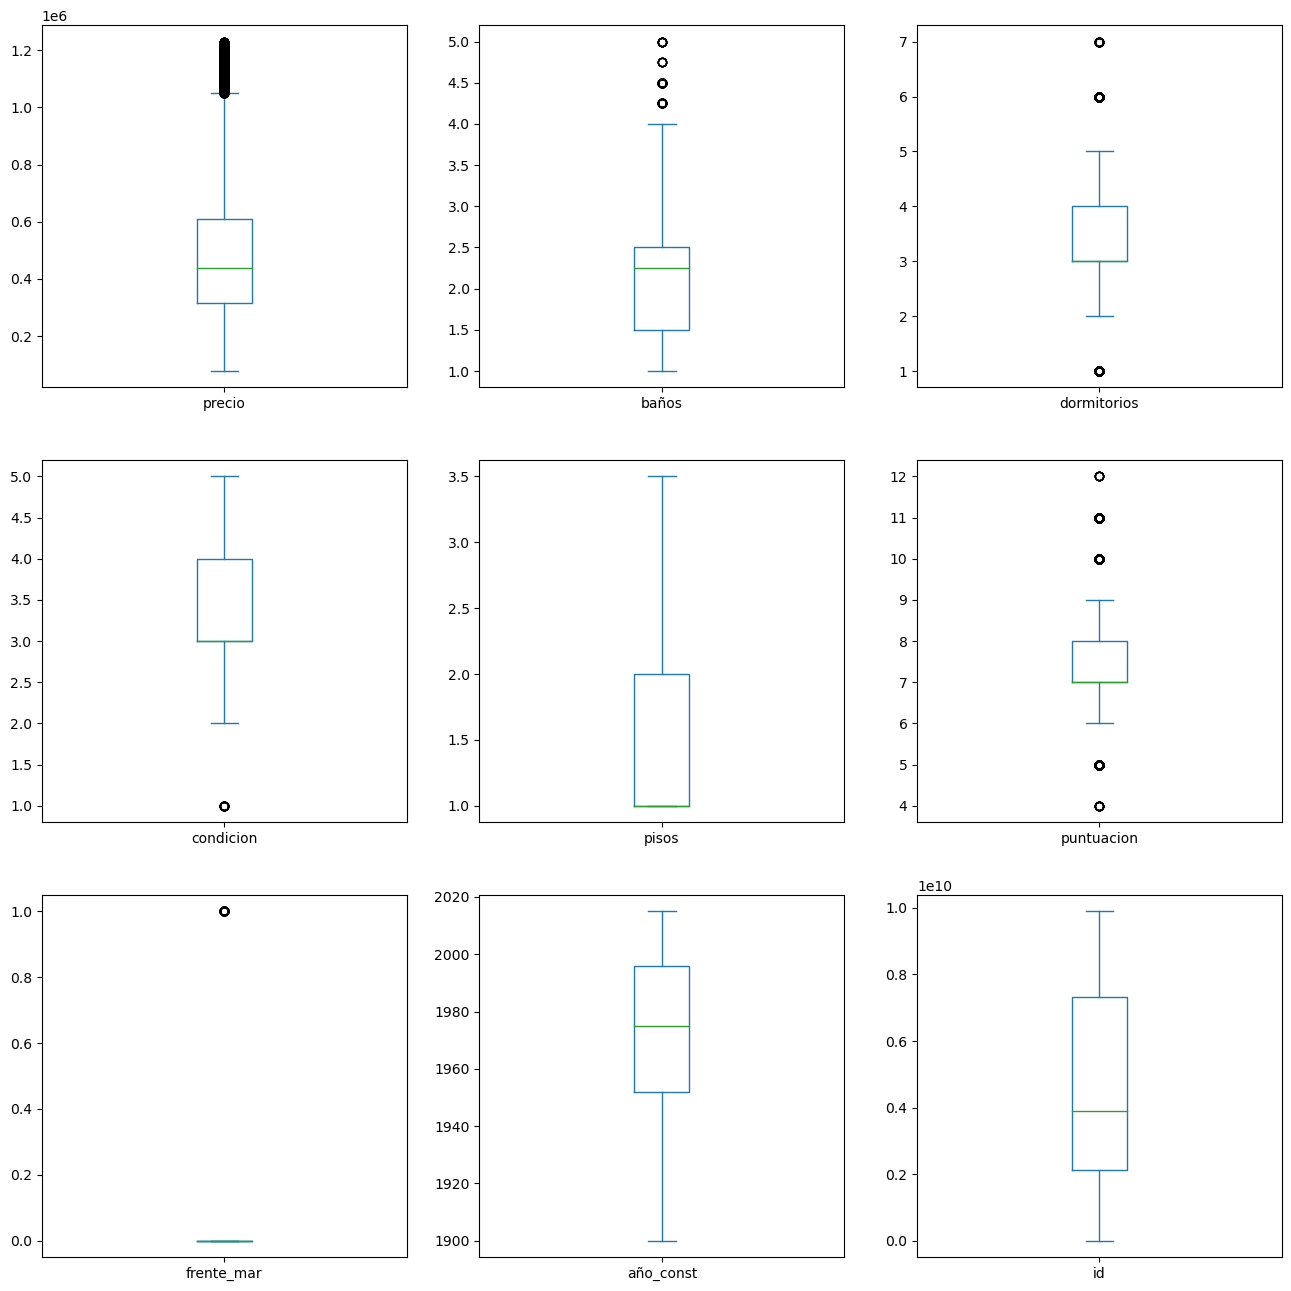

In [21]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
data.plot(ax = ax, kind = "box", subplots=True, layout= (3,3), sharex=False)
plt.show()

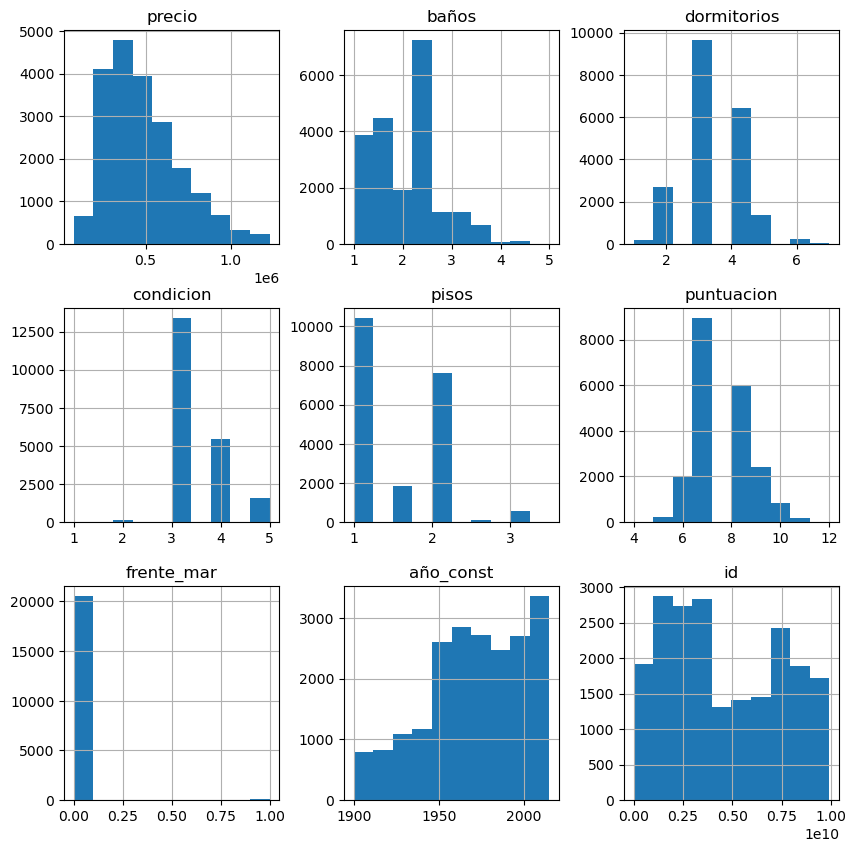

In [22]:
%matplotlib inline
# Histogramas
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [24]:
# Eliminamos las dos columnas que no son a primera vista significante para el modelo
del data["frente_mar"]
del data["id"]

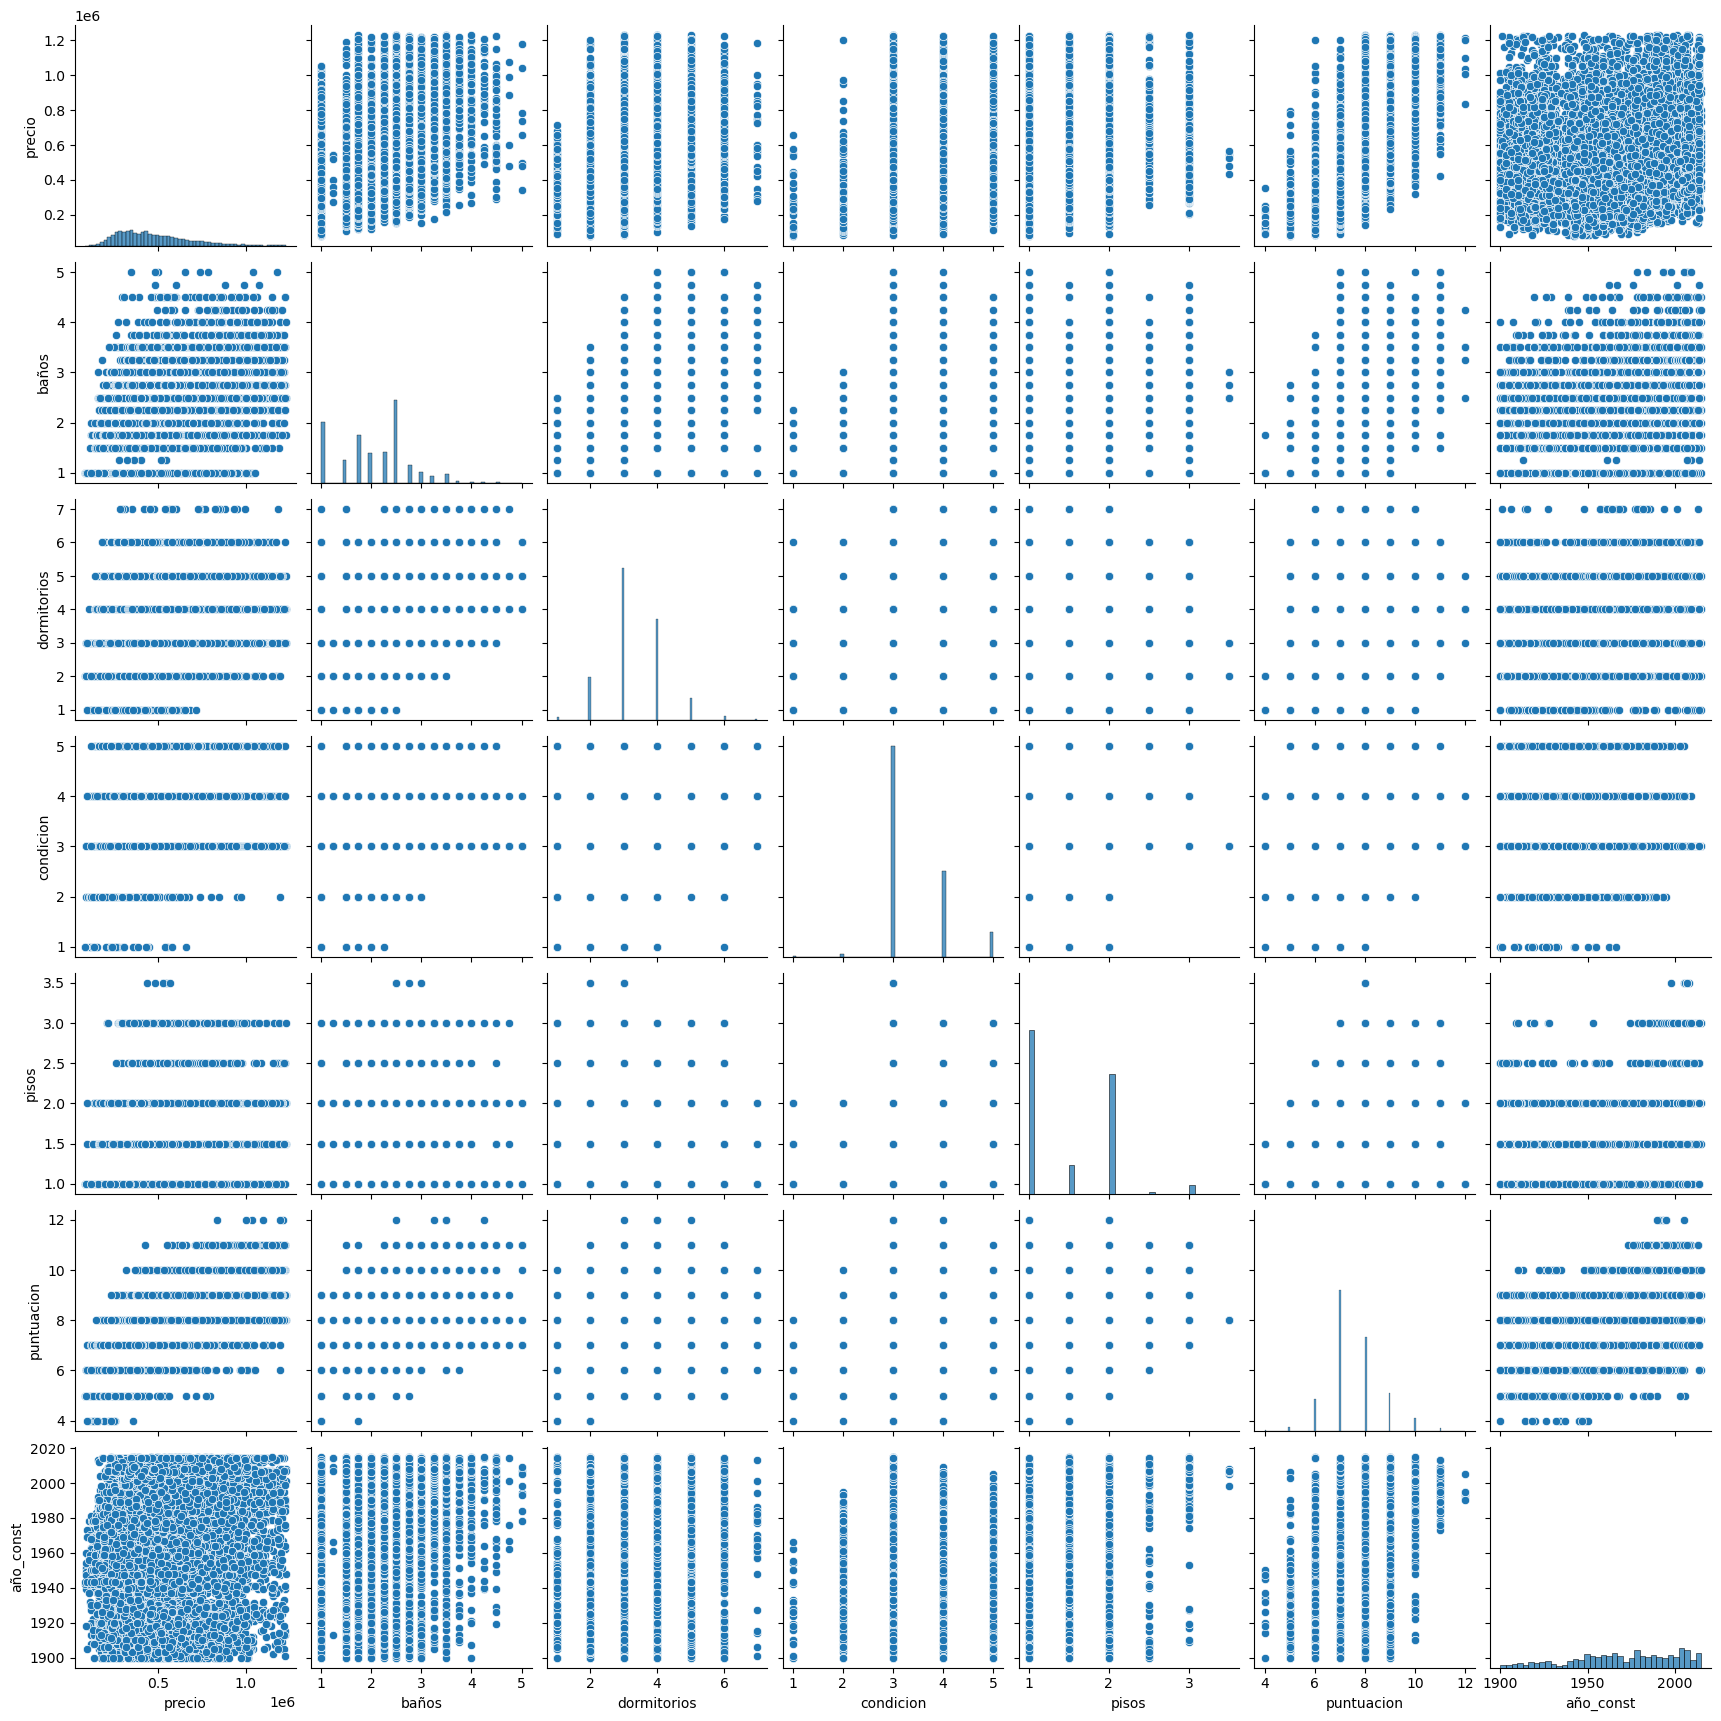

In [25]:
sns.pairplot(data)
plt.show()

In [94]:
data.head()

,precio,baños,dormitorios,condicion,pisos,puntuacion,año_const
0,221900.000,1.000,3,3,1.000,7,1955
1,538000.000,2.250,3,3,2.000,7,1951
2,180000.000,1.000,2,3,1.000,6,1933
3,604000.000,3.000,4,5,1.000,7,1965
4,510000.000,2.000,3,3,1.000,8,1987


In [127]:
names = ['precio', 'baños', 'dormitorios', 'condicion', 'pisos', 'puntuacion', 'año_const']
array = data.values
# array separada en componentes de entrada y salida
#X = array[:, 1:7]
#Y = array[:, 0].reshape(-1, 1)
X = data[[ 'baños', 'dormitorios', 'condicion', 'pisos', 'puntuacion', 'año_const']]
Y = data[['precio']]

validation_size = 0.25
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
                                               test_size=validation_size, random_state=seed)

Separamos nuestros datos en Train y Validación

In [128]:
# Transformamos nuestro Target
Y_train = np.log(Y_train)
Y_validation = np.log(Y_validation)

In [61]:
# Definimos nuestra semilla y nuestra metrica
seed = 7
scoring = 'neg_mean_squared_error'

# Añadimos en una lista nuestros modelos base
models = []
models.append(('LiR', LinearRegression()))
models.append(('HR', HuberRegressor()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('k-NN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [79]:
# Ejecutamos los modelos, y lo evaluamos mediante nuestra metrica.
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f}")

LiR: -0.100
HR: -0.162
LASSO: -0.207
EN: -0.206
k-NN: -0.112
CART: -0.147
SVM: -0.203


Podemos ver que LiR es el que obtiene el mejor rendimiento seguido muy de cerca de KNN y CART. Siempre es aconsejable observar la distribución de las métricas calculados en los _folds_ de validación cruzada. Podemos hacerlo gráficamente usando Boxplot.

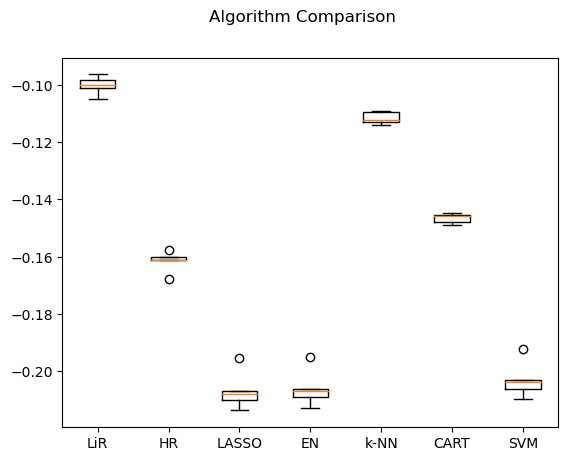

In [80]:
# Comparamos nuestros algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Optimizamos Modelos

In [81]:
# Modificamos los Hiperparametros de KNeighborsRegressor, ya que fue uno de los que nos dió mejor resultado.

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
algorithm = np.array(["auto", "ball_tree", "kd_tree", "brute"])
param_grid = dict(n_neighbors=k_values, algorithm=algorithm)

model = KNeighborsRegressor()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: -0.10336306757546136 using {'algorithm': 'brute', 'n_neighbors': 19}


In [82]:
# Modificamos los Hiperparametros de DecisionTreeRegressor, ya que fue uno de los que nos dió mejor resultado.

k_values = np.array([1,2,3,4,5,6,7,8,9,10])
param_grid = dict(max_depth=k_values)

model = DecisionTreeRegressor()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: -0.09820809743788869 using {'max_depth': 6}


## Algoritmos Emsablados

In [83]:
# Creamos nuestros modelos Ensamblados.
ensembles = []
ensembles.append(('ADR', AdaBoostRegressor()))
ensembles.append(('GBR', GradientBoostingRegressor()))
ensembles.append(('RFR', RandomForestRegressor()))
ensembles.append(('ETR', ExtraTreesRegressor()))

results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.2f}")

ADR: -0.11
GBR: -0.09
RFR: -0.11
ETR: -0.12


Vemos que los modelos ensamblados tienen mejores resultados.

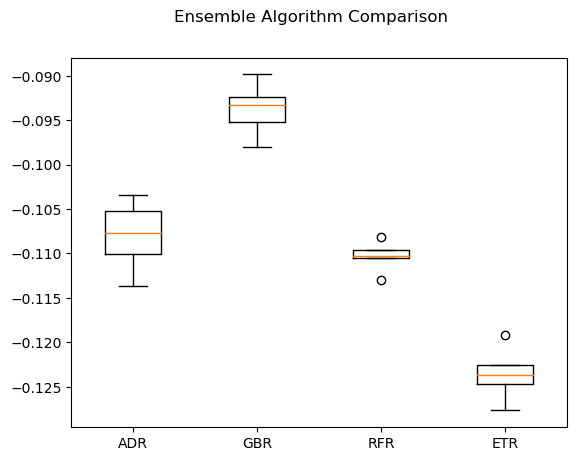

In [84]:
# Comparamos los algoritmos
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vemos que el mejor algortimo es el GradientBoostingRegressor

In [85]:
# Modificando Hiperparametro de GradientBoostingRegressor

k_values = np.array([50,100,150,200,250,300,350,400])
loss = np.array(["squared_error", "absolute_error", "huber", "quantile"])
criterion = np.array([ "friedman_mse", "squared_error" ])

param_grid = dict(loss = loss, n_estimators=k_values, criterion=criterion)

model = GradientBoostingRegressor(random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(X_train, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: -0.09331597684359409 using {'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 250}


Optenemos los mejores hiperparametros de nuestro algoritmo GradientBoostingRegressor.

## Forecasting

In [129]:
# Preparamos el modelo con los hiperparametros seleccionado.

GBR = GradientBoostingRegressor(loss = "huber", n_estimators=250, criterion="friedman_mse", random_state=7)
GBR.fit(X_train, Y_train)

GradientBoostingRegressor(loss='huber', n_estimators=250, random_state=7)

In [130]:
# Evaluamos nuestro modelo con nuestro Test, mediando las metricas seleccionadas
prediccion = GBR.predict(X_validation)

print("MSE:", mean_squared_error(Y_validation, prediccion))

mae = mean_absolute_error(Y_validation, prediccion)
print(f"MAE: {mae}")

MSE: 0.08774501159654832
MAE: 0.2342960042274093


In [90]:
data_frame = pd.DataFrame()
data_frame["Y_test"] = np.exp(Y_validation)
data_frame["Y_predict"] = np.exp(predictions)
data_frame["residuos"] = data_frame["Y_test"] - data_frame["Y_predict"] 
data_frame

,Y_test,Y_predict,residuos
18589,732500.000,602541.668,129958.332
7503,549000.000,454511.372,94488.628
15486,335000.000,531933.323,-196933.323
8971,392800.000,321555.162,71244.838
7653,830000.000,716507.639,113492.361
...,...,...,...
1122,975000.000,899737.998,75262.002
12812,420000.000,637791.408,-217791.408
9472,495000.000,456624.596,38375.404
13214,402000.000,313059.610,88940.390


Obtenemos los valores reales, ya que a nuestro Target lo logaritmisamos, por lo que usamos un antilogaritmo.

In [93]:
# Guardamos nuestro modelo
import joblib as jbl

fillname = r"modelo_precio.sav"
jbl.dump(model, fillname)

['modelo_precio.sav']

In [96]:
# Lo cargamos y probamos.
load_model = jbl.load(fillname)
results = load_model.predict(np.array([[3, 4, 3, 1, 7, 2011]]))
np.exp(results)

array([379881.13794299])